In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\RP LAPTOP\Desktop\bupa.data.csv')
df

,msv,alkphos,sgpt,sgot,gammagt,drink,selector
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2
...,...,...,...,...,...,...,...
340,99,75,26,24,41,12.0,1
341,96,69,53,43,203,12.0,2
342,98,77,55,35,89,15.0,1
343,91,68,27,26,14,16.0,1


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   msv       345 non-null    int64  
 1   alkphos   345 non-null    int64  
 2   sgpt      345 non-null    int64  
 3   sgot      345 non-null    int64  
 4   gammagt   345 non-null    int64  
 5   drink     345 non-null    float64
 6   selector  345 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


In [4]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,msv,alkphos,sgpt,sgot,gammagt,drink,selector
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,90.159420,69.869565,30.405797,24.643478,38.284058,3.455072,1.579710
std,4.448096,18.347670,19.512309,10.064494,39.254616,3.337835,0.494322
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
10%,85.000000,48.400000,15.000000,15.000000,11.000000,0.500000,1.000000
25%,87.000000,57.000000,19.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,46.000000,6.000000,2.000000
90%,96.000000,94.600000,51.600000,35.000000,82.000000,8.000000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


In [5]:
df=df.loc[:,(df.columns != 'selector')]

In [6]:
df.columns

Index(['msv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drink'], dtype='object')

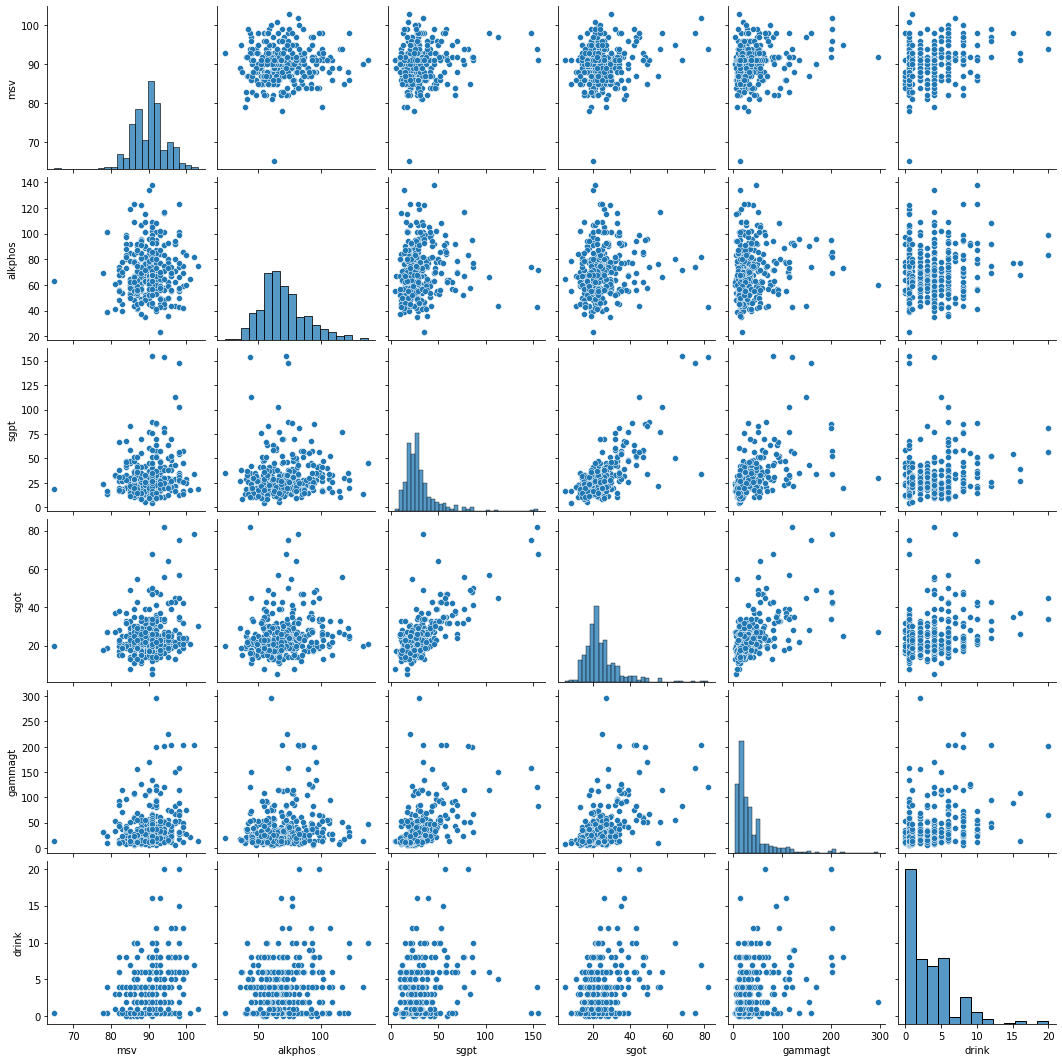

In [7]:
sns.pairplot(df)

In [8]:
df.corr()

,msv,alkphos,sgpt,sgot,gammagt,drink
msv,1.000000,0.044103,0.147695,0.187765,0.222314,0.312680
alkphos,0.044103,1.000000,0.076208,0.146057,0.133140,0.100796
sgpt,0.147695,0.076208,1.000000,0.739675,0.503435,0.206848
sgot,0.187765,0.146057,0.739675,1.000000,0.527626,0.279588
gammagt,0.222314,0.133140,0.503435,0.527626,1.000000,0.341224
drink,0.312680,0.100796,0.206848,0.279588,0.341224,1.000000


<AxesSubplot:>

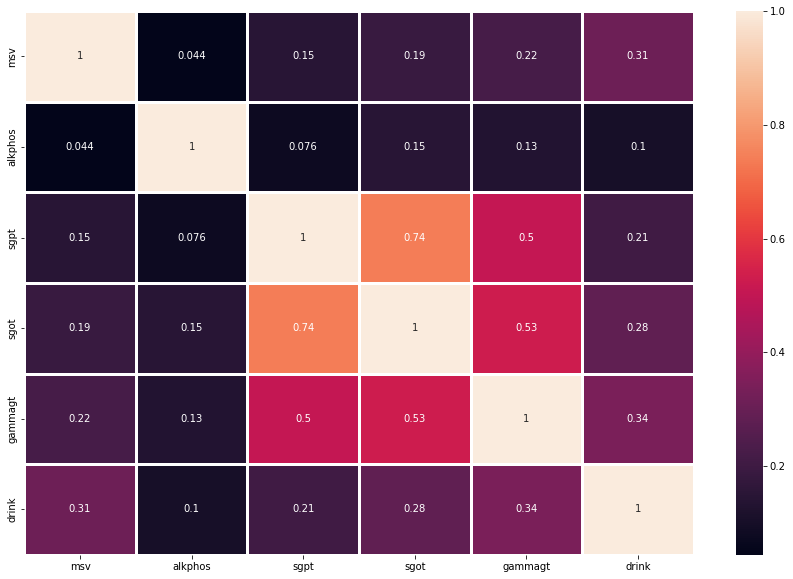

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidths=3)

In [10]:
df.isnull().sum()

msv        0
alkphos    0
sgpt       0
sgot       0
gammagt    0
drink      0
dtype: int64

In [11]:
df= df[~df.msv.isnull()].copy()
df

,msv,alkphos,sgpt,sgot,gammagt,drink
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0
...,...,...,...,...,...,...
340,99,75,26,24,41,12.0
341,96,69,53,43,203,12.0
342,98,77,55,35,89,15.0
343,91,68,27,26,14,16.0


In [12]:
df.isnull().sum()

msv        0
alkphos    0
sgpt       0
sgot       0
gammagt    0
drink      0
dtype: int64

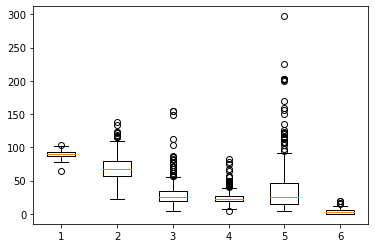

In [13]:
plt.boxplot(df)
plt.show()

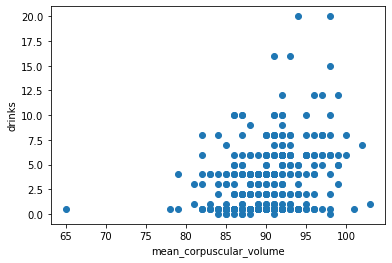

In [14]:
plt.scatter(x=df.msv, y= df.drink)
plt.xlabel('mean_corpuscular_volume')
plt.ylabel('drinks')
plt.show()

In [15]:
x=df.loc[:,(df.columns != 'drink')]
y=df.drink

In [16]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as met

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_train.shape

(276, 5)

In [19]:
x_test.shape

(69, 5)

In [20]:
y_train.shape

(276,)

In [21]:
y_test.shape

(69,)

In [22]:
model = LinearRegression()

In [23]:
model.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=model.predict(x_test)

Text(0, 0.5, 'predicted drink')

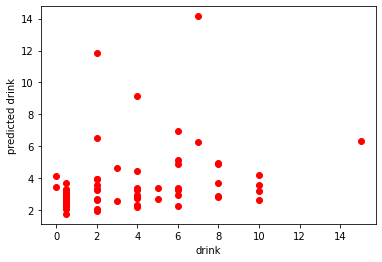

In [25]:
plt.scatter(y_test,y_pred,color='r')
plt.plot()
plt.xlabel('drink')
plt.ylabel('predicted drink')

In [26]:
met.mean_squared_error(y_test,y_pred)

11.084031035286344